In [1]:
# Importing Library 
import warnings
warnings.filterwarnings('ignore')

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio

In [2]:
tickers = ['SIE', 'DTE', 'ALV', 'MRK', 'DHL']

In [3]:
# Split the Data into Training and Test set
# Set date variable
start_date = '2010-01-04' # Start date of training set
end_date = '2020-10-08' # End date of training set
test_start_date = '2020-10-09' # End date of test set
test_end_date = '2023-06-30' # End date of test set

In [4]:
df1 = pd.read_csv("LR_1 feature.csv")
df2 = pd.read_csv("LR_2 feature.csv")
df3 = pd.read_csv("LR_3 feature.csv")

In [5]:
actual_returns = pd.read_csv("actual_returns.csv", index_col=[0])
actual_test = pd.read_csv("actual_test.csv")

In [6]:
actual_test

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,29.719999
1,88.153114,12.755207,170.705826,98.225822,29.760000
2,88.775276,12.941236,173.379425,99.027473,30.315001
3,89.521896,12.929710,173.095856,99.970581,30.395000
4,87.922020,13.040010,174.473190,100.253517,30.520000
...,...,...,...,...,...
942,155.479996,19.695999,209.199997,152.600006,43.000000
943,157.559998,19.906000,211.300003,147.199997,43.500000
944,152.720001,20.030001,211.649994,150.500000,44.305000
945,150.580002,19.930000,211.050003,149.600006,44.195000


In [7]:
actual_returns

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.006496,-0.003806,0.002743,0.004987,0.007566
2020-10-12,0.007888,0.006599,0.010111,0.000000,0.000485
2020-10-13,-0.010673,0.003106,-0.019548,-0.003435,0.004116
2020-10-14,0.010428,-0.004128,0.003003,-0.016852,0.011575
2020-10-15,-0.027224,-0.031434,-0.028619,-0.035450,-0.029559
...,...,...,...,...,...
2023-06-26,-0.009555,0.007056,0.000239,-0.002288,-0.004399
2023-06-27,0.013378,0.010662,0.010038,-0.035387,0.011628
2023-06-28,-0.030718,0.006229,0.001656,0.022418,0.018506


# 1 Base scenario (2 features)

In [8]:
df2.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [9]:
df2.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [10]:
df2.set_index('Date', inplace=True)
df2

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,156.844708,19.554052,209.157471,152.961751,43.210404,Y
2023-06-27,155.347278,19.691952,209.207462,152.611896,43.020411,Y
2023-06-28,157.423717,19.901801,211.306969,147.213989,43.520397,Y


The forecast-prices-1.csv is included actual prices in train period and forecasted prices in test period.

In [11]:
# Split data set to training set and test set
train = df2.loc[:end_date] # this is actual prices
test = df2.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [12]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,101.967320,13.031255,144.473772,126.037858,41.298105,Y
2020-10-12,102.628866,12.981693,144.869934,126.666077,41.468102,Y
2020-10-13,103.437422,13.067301,146.334002,126.666077,41.948089,Y
2020-10-14,102.334838,13.107852,143.474773,126.231157,40.708120,Y
2020-10-15,103.400666,13.053785,143.905396,124.104849,41.268107,Y
...,...,...,...,...,...,...
2023-06-26,156.844708,19.554052,209.157471,152.961751,43.210404,Y
2023-06-27,155.347278,19.691952,209.207462,152.611896,43.020411,Y
2023-06-28,157.423717,19.901801,211.306969,147.213989,43.520397,Y


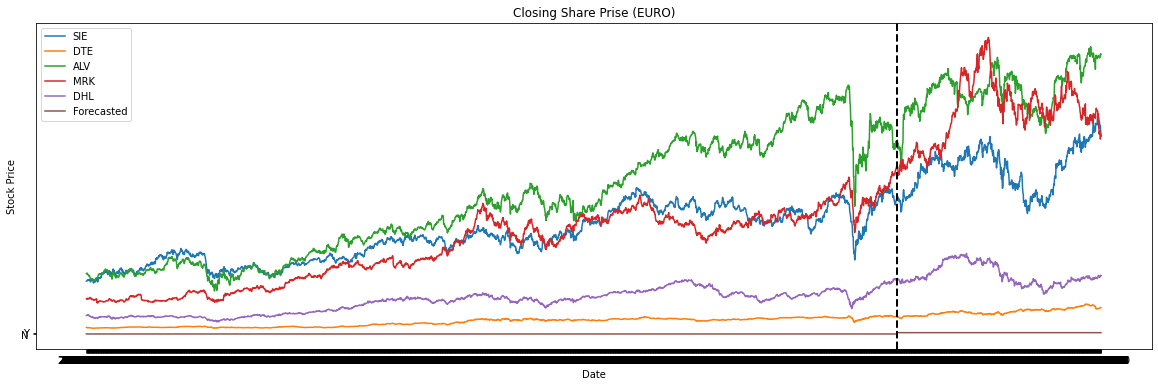

In [13]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df2.columns:
    plt.plot(df2.index, df2[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [14]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df2.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [15]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df2 = df2[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns2 = forecast_returns_df2.iloc[start:]
forecast_returns2 = forecast_returns2.reset_index(drop=True)

In [16]:
forecast_returns2

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,-0.022035,0.006377,0.003357,0.001309,-0.003114
943,-0.009547,0.007052,0.000239,-0.002287,-0.004397
944,0.013366,0.010657,0.010036,-0.035370,0.011622
945,-0.030692,0.006226,0.001656,0.022408,0.018497


## 1.1 Maximize the Sharpe ratio

In [17]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_2 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_2.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]

    portfolio_weights_min_var_2[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

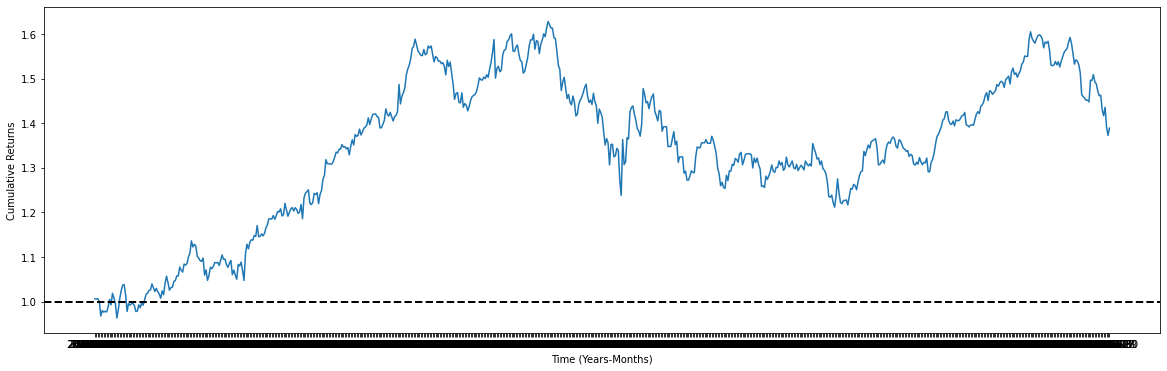

In [18]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_2 = np.sum(actual_returns.multiply(portfolio_weights_min_var_2), axis=1)
cumulative_returns_daily_min_var_2 = (1 + return_stocks_min_var_2).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_2)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [19]:
# Calculate portfolio variance
portfolio_variance_min_var_2 = np.dot(portfolio_weights_min_var_2[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_2[-1]))
portfolio_variance_min_var_2

0.00031844719697939555

In [20]:
# Calculate standard deviation
std_min_var_2 = np.sqrt(portfolio_variance_min_var_2)
std_min_var_2

0.01784508887563734

In [21]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_2[-1]

1.3890482506738044

In [22]:
# Check negative weights
np.any(portfolio_weights_min_var_2 < 0)

False

In [23]:
return_stocks_min_var_2.index = pd.to_datetime(return_stocks_min_var_2.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,12.654%
Cumulative returns,38.905%
Annual volatility,21.158%
Sharpe ratio,0.67
Calmar ratio,0.49
Stability,0.35
Max drawdown,-25.581%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.58,2021-12-28,2022-09-30,NaT,NaN
1,10.12,2021-08-20,2021-10-11,2021-11-19,66
2,7.81,2021-01-14,2021-03-05,2021-03-12,42
3,5.82,2020-11-06,2020-11-18,2020-12-03,20
4,5.50,2021-11-22,2021-12-02,2021-12-22,23


Stress Events,mean,min,max
New Normal,0.06%,-5.45%,10.12%


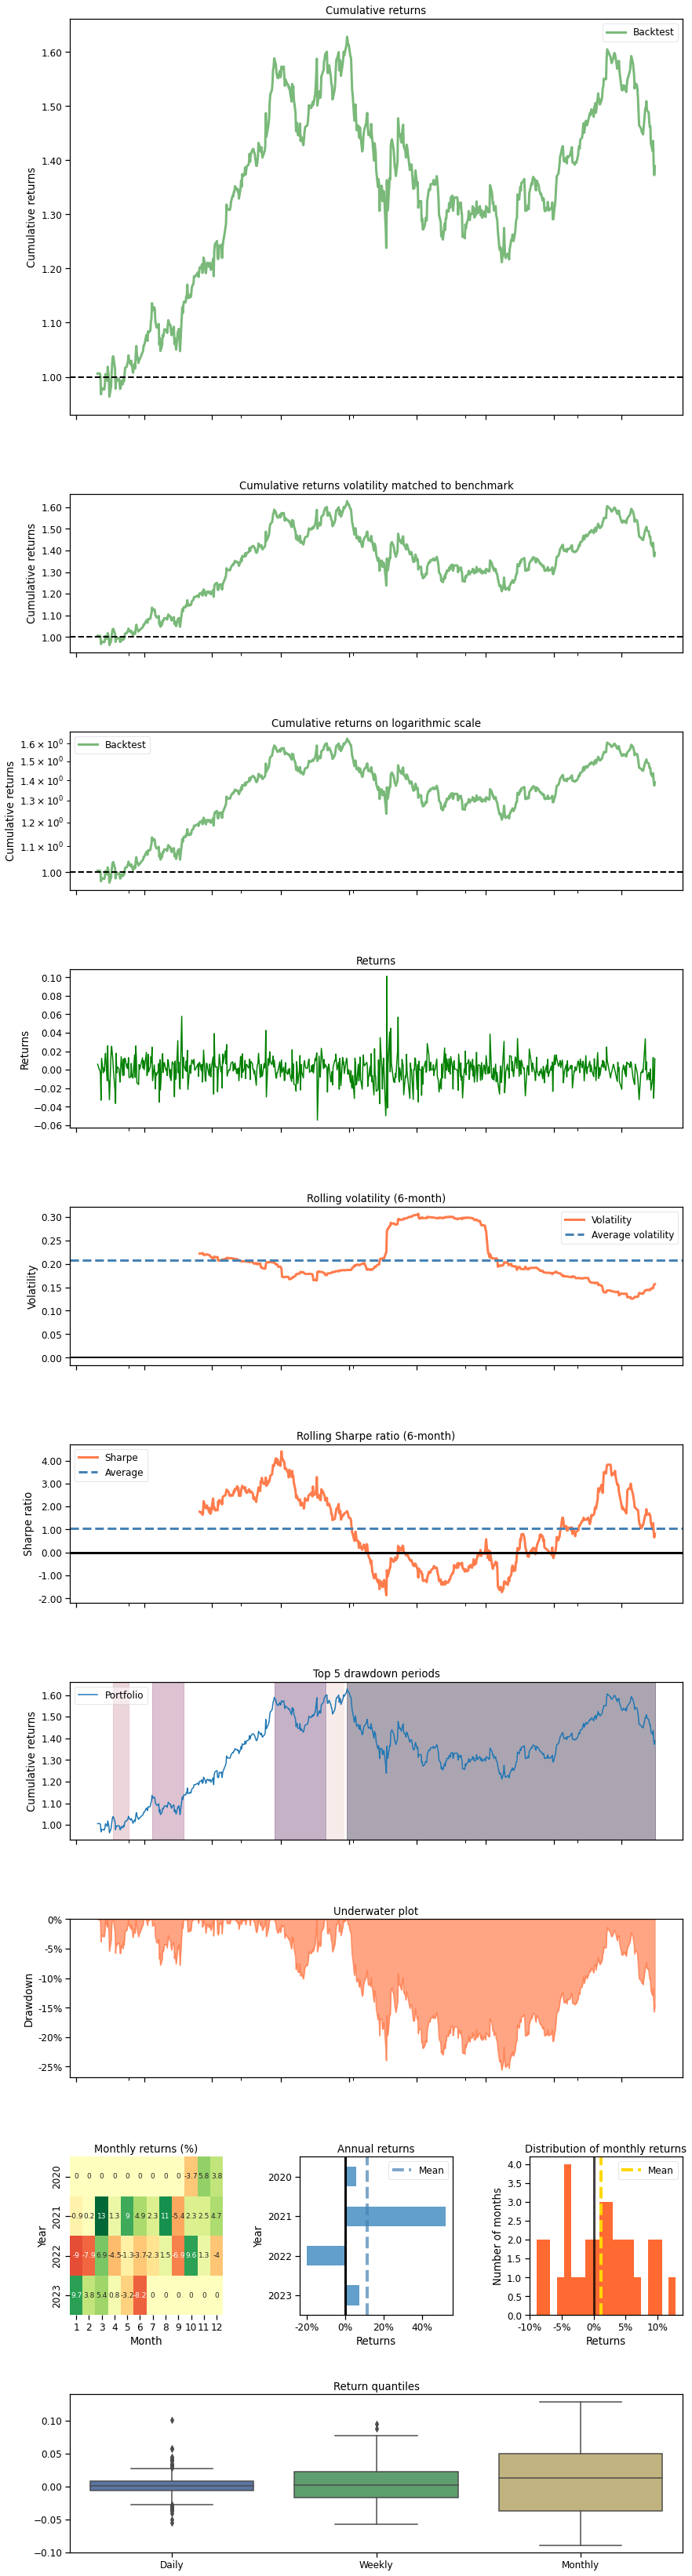

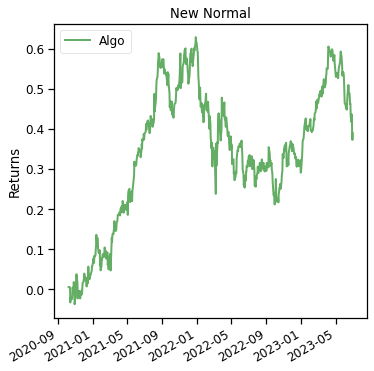

In [24]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_2, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

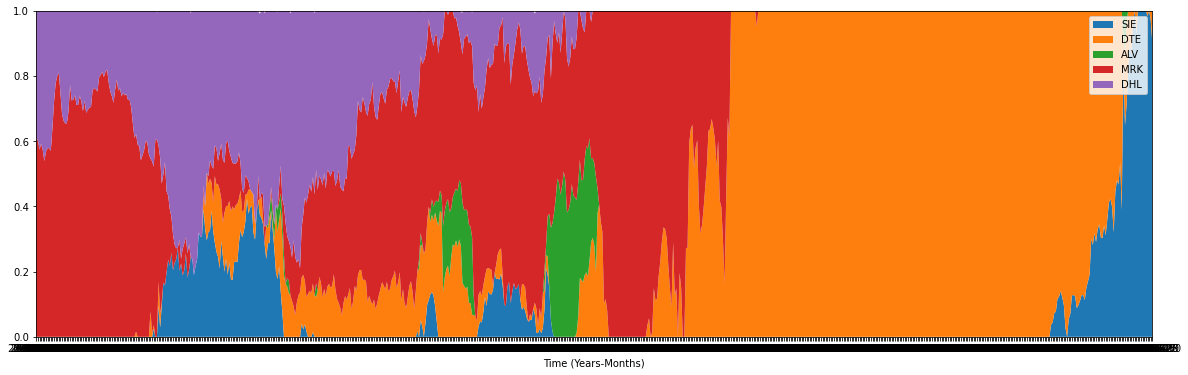

In [25]:
df_plot = pd.DataFrame (portfolio_weights_min_var_2, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [26]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.00000,0.0,0.60939,0.39061
2020-10-12,0.00000,0.00000,0.0,0.60169,0.39831
2020-10-13,0.00000,0.00000,0.0,0.57383,0.42617
2020-10-14,0.00000,0.00000,0.0,0.59250,0.40750
2020-10-15,0.00000,0.00000,0.0,0.57272,0.42728
...,...,...,...,...,...
2023-06-26,1.00000,0.00000,0.0,0.00000,0.00000
2023-06-27,0.98322,0.01678,0.0,0.00000,0.00000
2023-06-28,1.00000,0.00000,0.0,0.00000,0.00000


In [27]:
df_plot.to_csv('LR_min_var_2.csv', index=True)

## 1.2 Minimize the volatility

In [28]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df2.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [29]:
data

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,32.020000
1,88.153107,12.755207,170.705811,98.225822,32.090000
2,88.775276,12.941236,173.379425,99.027466,32.095001
3,89.521896,12.929710,173.095856,99.970581,31.940001
4,87.922012,13.040010,174.473190,100.253525,31.750000
...,...,...,...,...,...
942,156.844708,19.554052,209.157471,152.961751,43.210404
943,155.347278,19.691952,209.207462,152.611896,43.020411
944,157.423717,19.901801,211.306969,147.213989,43.520397
945,152.592012,20.025713,211.656877,150.512707,44.325376


In [30]:
actual_test

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,29.719999
1,88.153114,12.755207,170.705826,98.225822,29.760000
2,88.775276,12.941236,173.379425,99.027473,30.315001
3,89.521896,12.929710,173.095856,99.970581,30.395000
4,87.922020,13.040010,174.473190,100.253517,30.520000
...,...,...,...,...,...
942,155.479996,19.695999,209.199997,152.600006,43.000000
943,157.559998,19.906000,211.300003,147.199997,43.500000
944,152.720001,20.030001,211.649994,150.500000,44.305000
945,150.580002,19.930000,211.050003,149.600006,44.195000


In [31]:
# Perform Minimum variance optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_vol_2 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_vol_2.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
     
    weights = ef.min_volatility()
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]
   
    portfolio_weights_min_vol_2[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

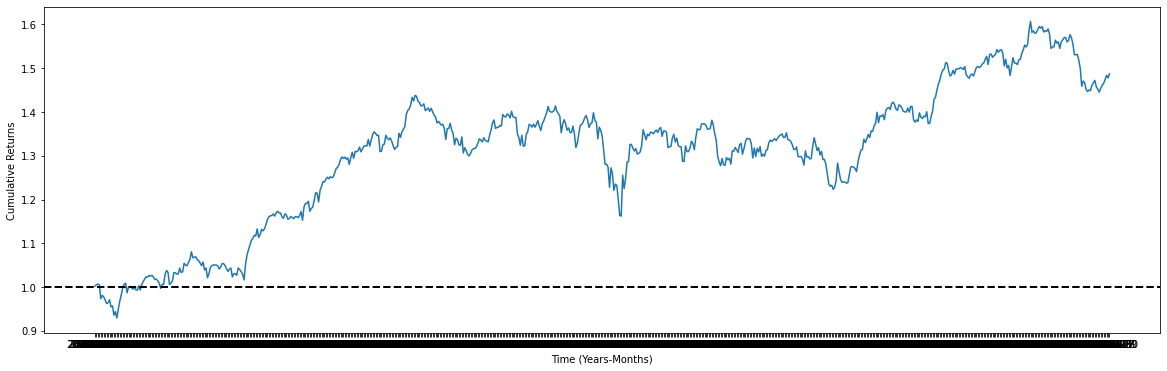

In [32]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_vol_2 = np.sum(actual_returns.multiply(portfolio_weights_min_vol_2), axis=1)
cumulative_returns_daily_min_vol_2 = (1 + return_stocks_min_vol_2).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_vol_2)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [33]:
# Calculate portfolio variance
portfolio_variance_min_vol_2 = np.dot(portfolio_weights_min_vol_2[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_vol_2[-1]))
portfolio_variance_min_vol_2

0.00011542895602607536

In [34]:
# Calculate standard deviation
std_min_vol_2 = np.sqrt(portfolio_variance_min_vol_2)
std_min_vol_2

0.010743786856880369

In [35]:
# Calculate porfolio returns
cumulative_returns_daily_min_vol_2[-1]

1.487269927847599

In [36]:
# Check negative weights
np.any(portfolio_variance_min_vol_2 < 0)

False

In [37]:
return_stocks_min_vol_2.index = pd.to_datetime(return_stocks_min_vol_2.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,15.48%
Cumulative returns,48.727%
Annual volatility,16.812%
Sharpe ratio,0.94
Calmar ratio,0.81
Stability,0.69
Max drawdown,-19.173%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.17,2021-08-20,2022-03-08,2023-01-06,361
1,10.05,2023-04-06,2023-06-21,NaT,NaN
2,7.71,2020-10-13,2020-10-30,2020-11-09,20
3,5.94,2021-01-14,2021-03-05,2021-03-10,40
4,3.86,2023-03-06,2023-03-17,2023-03-31,20


Stress Events,mean,min,max
New Normal,0.06%,-3.65%,8.03%


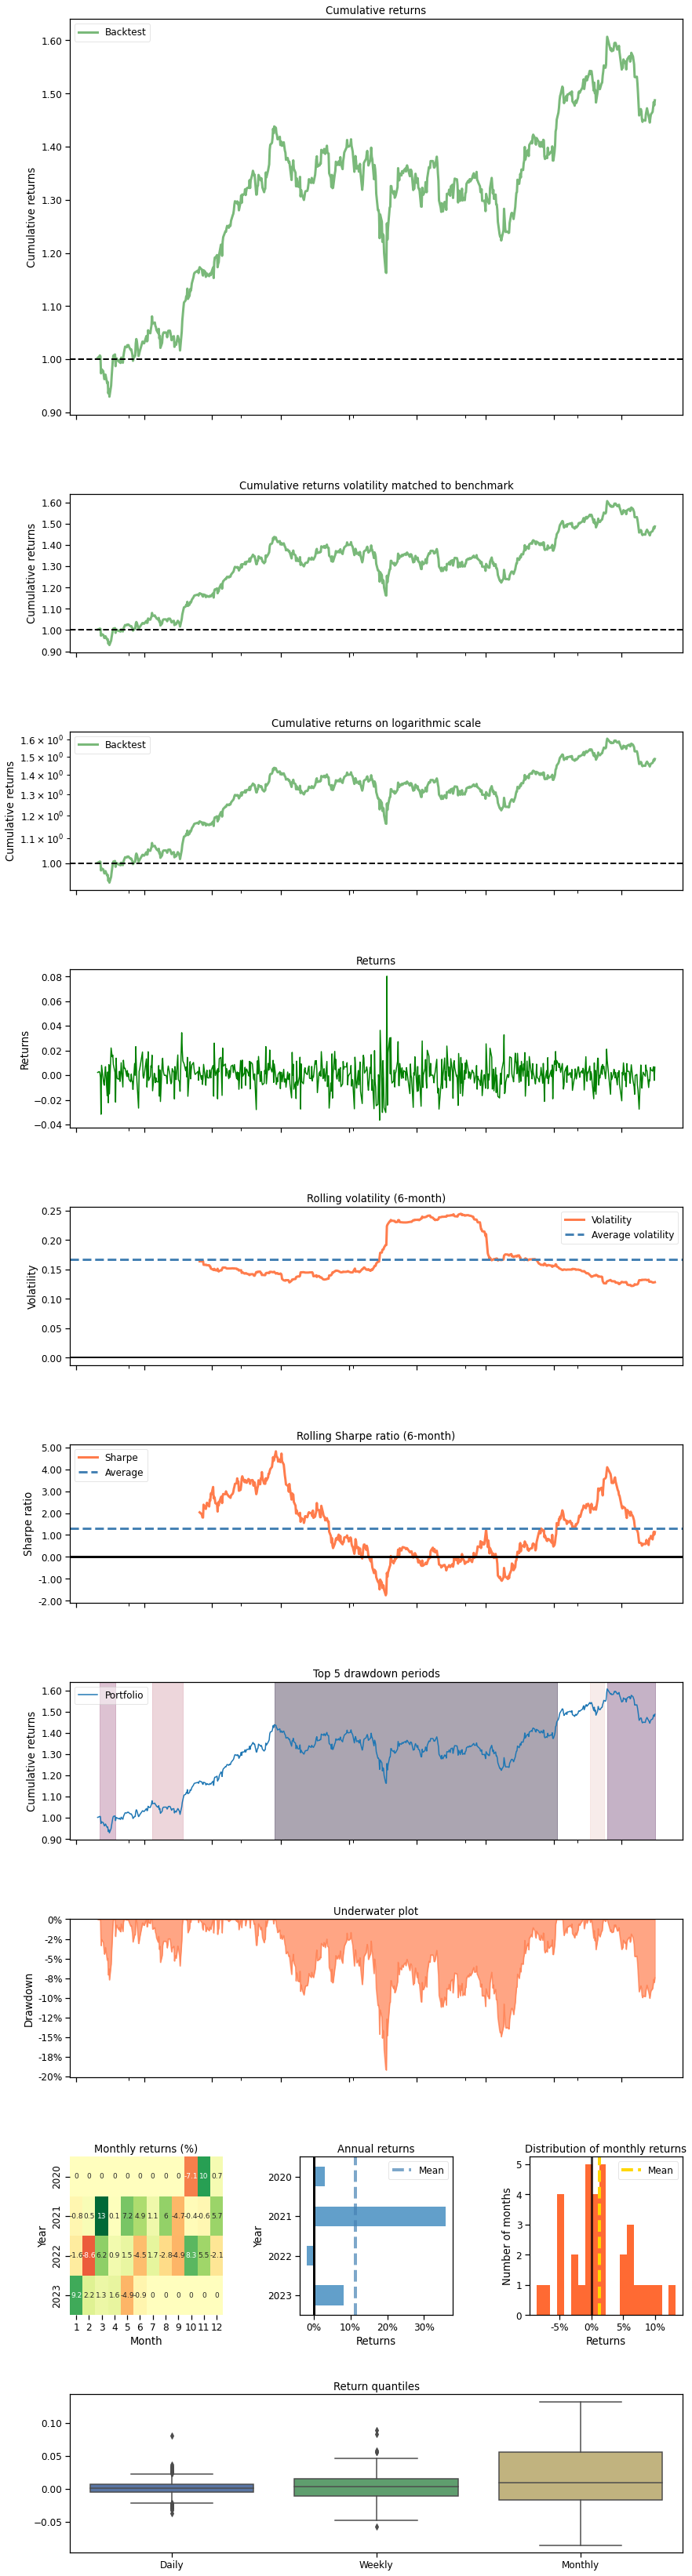

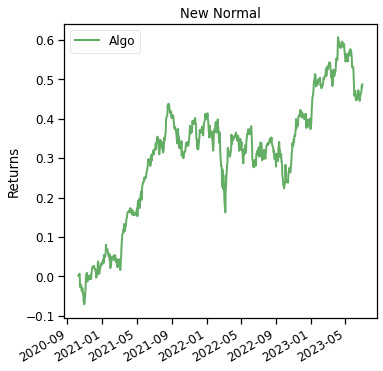

In [38]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_vol_2, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

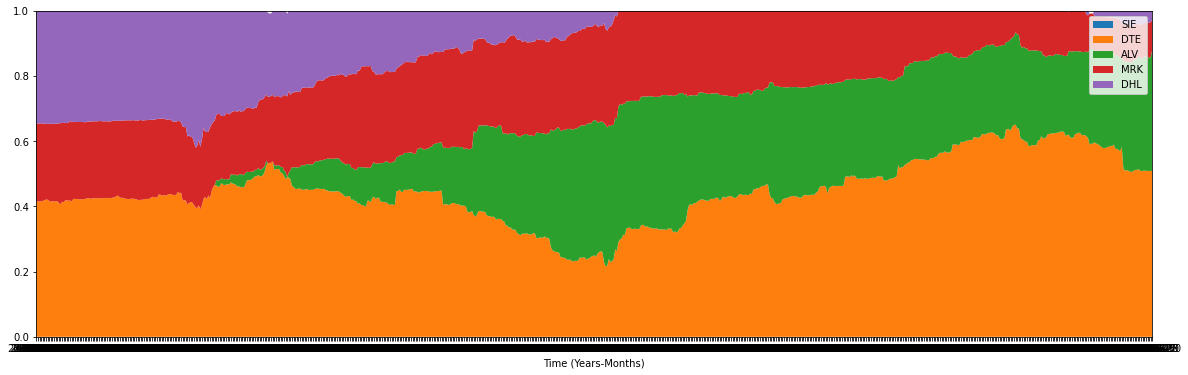

In [39]:
df_plot = pd.DataFrame (portfolio_weights_min_vol_2, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [40]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.0,0.41450,0.00000,0.23924,0.34626
2020-10-12,0.0,0.41527,0.00000,0.23884,0.34589
2020-10-13,0.0,0.41515,0.00000,0.23921,0.34565
2020-10-14,0.0,0.41545,0.00000,0.23928,0.34527
2020-10-15,0.0,0.41647,0.00000,0.23760,0.34594
...,...,...,...,...,...
2023-06-26,0.0,0.50904,0.34999,0.10239,0.03858
2023-06-27,0.0,0.50846,0.35097,0.10189,0.03869
2023-06-28,0.0,0.50841,0.34654,0.10815,0.03691


In [41]:
df_plot.to_csv('LR_min_vol_2.csv', index=True)

# 2 Less features scenario (1 feature)

In [42]:
df1.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [43]:
len(df1)

3449

In [44]:
df1.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [45]:
df1.set_index('Date', inplace=True)
df1

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,156.854762,19.552452,209.103934,152.969407,43.189741,Y
2023-06-27,155.357408,19.690342,209.153900,152.619483,42.999843,Y
2023-06-28,157.433741,19.900178,211.252364,147.220505,43.499578,Y


In [46]:
# Split data set to training set and test set
train = df1.loc[:end_date] # this is actual prices
test = df1.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [47]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,101.987033,13.030531,144.443444,126.057298,41.300741,Y
2020-10-12,102.648546,12.980972,144.839409,126.685642,41.470653,Y
2020-10-13,103.457061,13.066574,146.302750,126.685642,41.950399,Y
2020-10-14,102.354532,13.107123,143.444941,126.250636,40.711053,Y
2020-10-15,103.420307,13.053059,143.875350,124.123906,41.270758,Y
...,...,...,...,...,...,...
2023-06-26,156.854762,19.552452,209.103934,152.969407,43.189741,Y
2023-06-27,155.357408,19.690342,209.153900,152.619483,42.999843,Y
2023-06-28,157.433741,19.900178,211.252364,147.220505,43.499578,Y


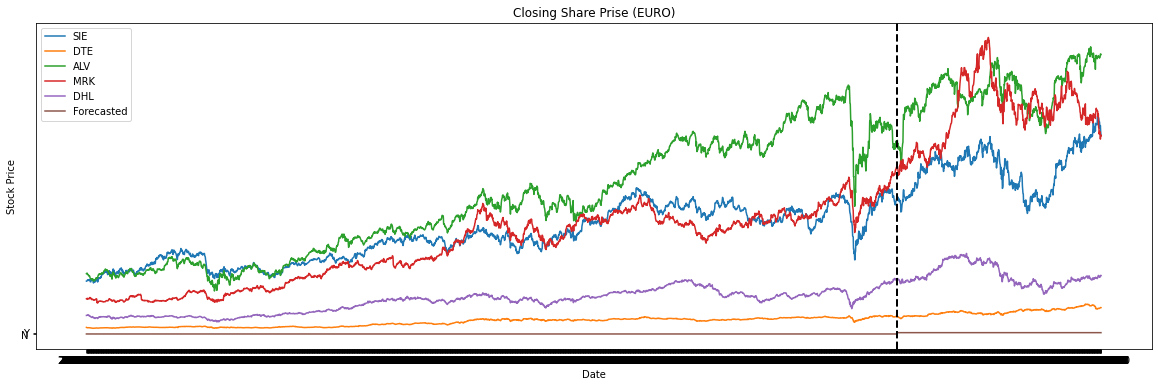

In [48]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df1.columns:
    plt.plot(df1.index, df1[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [49]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df1.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [50]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df1 = df1[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns1 = forecast_returns_df1.iloc[start:]
forecast_returns1 = forecast_returns1.reset_index(drop=True)

In [51]:
forecast_returns1

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,-0.022033,0.006377,0.003356,0.001309,-0.003114
943,-0.009546,0.007052,0.000239,-0.002288,-0.004397
944,0.013365,0.010657,0.010033,-0.035375,0.011622
945,-0.030689,0.006226,0.001656,0.022411,0.018496


## 2.1 Maximize the Sharpe ratio

In [52]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_1 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_1.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]
    
    portfolio_weights_min_var_1[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

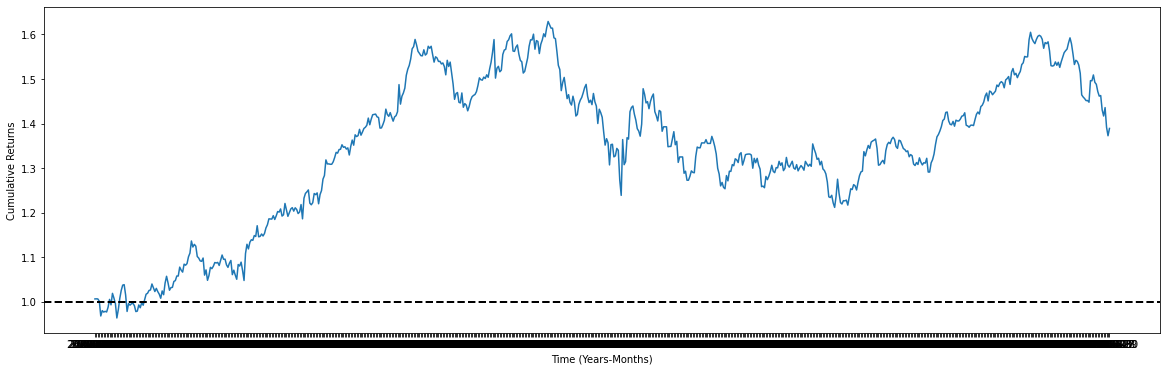

In [53]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_1 = np.sum(actual_returns.multiply(portfolio_weights_min_var_1), axis=1)
cumulative_returns_daily_min_var_1 = (1 + return_stocks_min_var_1).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_1)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [54]:
# Calculate portfolio variance
portfolio_variance_min_var_1 = np.dot(portfolio_weights_min_var_1[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_1[-1]))
portfolio_variance_min_var_1

0.0003186136555846454

In [55]:
# Calculate standard deviation
std_min_var_1 = np.sqrt(portfolio_variance_min_var_1)
std_min_var_1

0.017849752255553727

In [56]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_1[-1]

1.388935957380394

In [57]:
# Check negative weights
np.any(portfolio_weights_min_var_1 < 0)

False

In [58]:
return_stocks_min_var_1.index = pd.to_datetime(return_stocks_min_var_1.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,12.651%
Cumulative returns,38.894%
Annual volatility,21.161%
Sharpe ratio,0.67
Calmar ratio,0.49
Stability,0.35
Max drawdown,-25.632%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.63,2021-12-28,2022-09-30,NaT,NaN
1,10.09,2021-08-20,2021-10-11,2021-11-19,66
2,7.81,2021-01-14,2021-03-05,2021-03-12,42
3,5.82,2020-11-06,2020-11-18,2020-12-03,20
4,5.50,2021-11-22,2021-12-02,2021-12-22,23


Stress Events,mean,min,max
New Normal,0.06%,-5.45%,10.12%


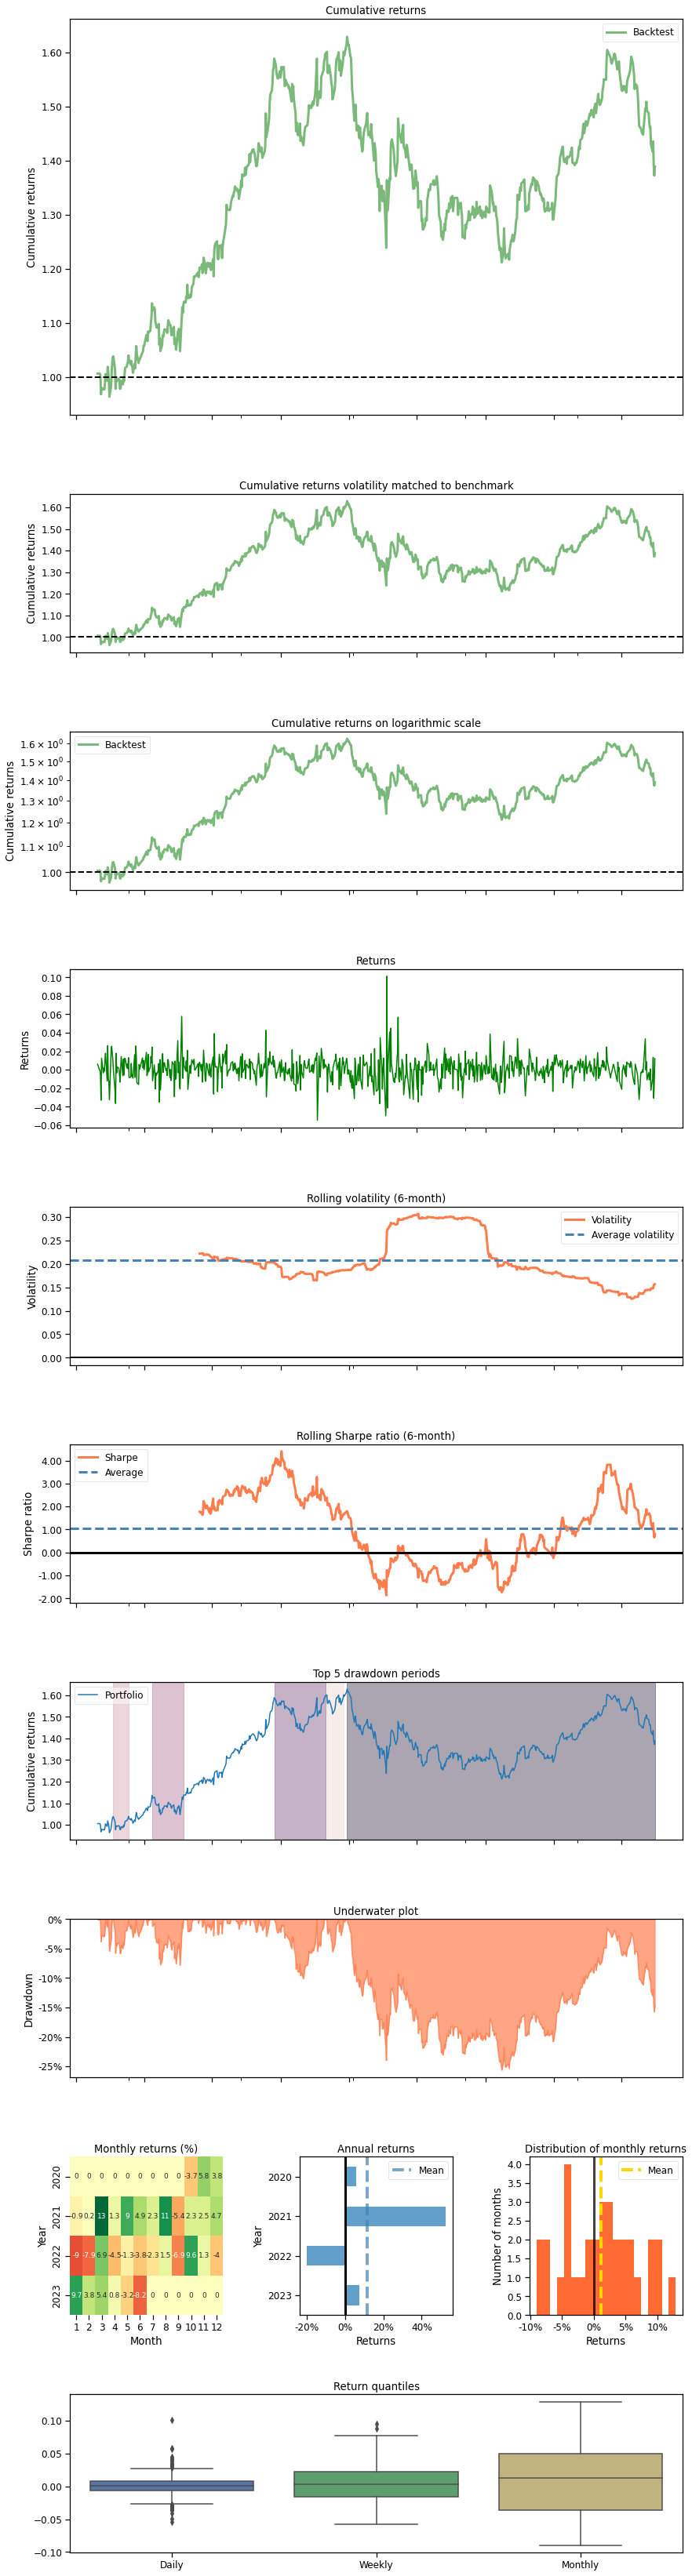

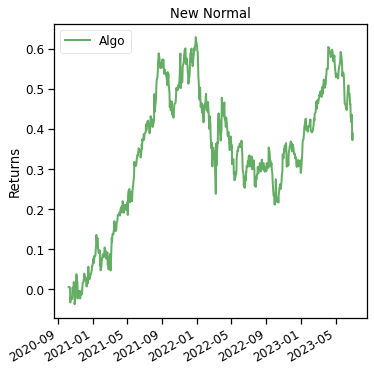

In [59]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_1, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

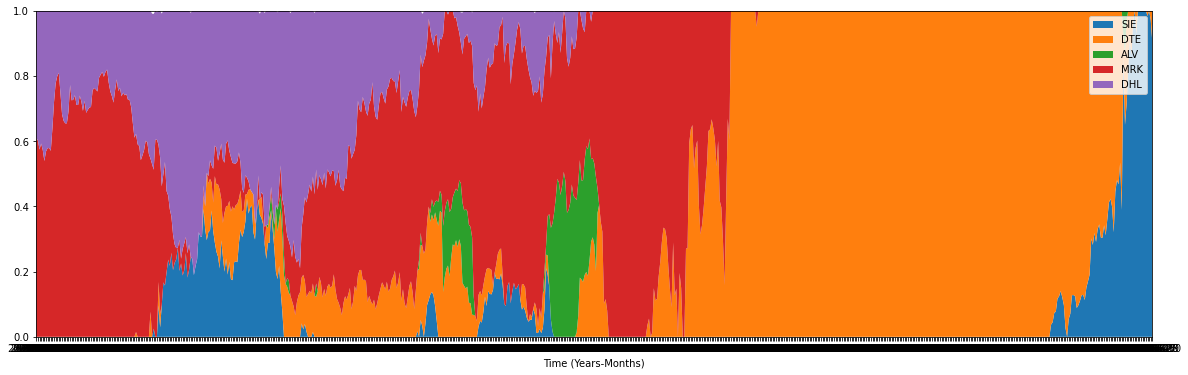

In [60]:
df_plot = pd.DataFrame (portfolio_weights_min_var_1, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [61]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.00000,0.0,0.60949,0.39051
2020-10-12,0.00000,0.00000,0.0,0.60180,0.39820
2020-10-13,0.00000,0.00000,0.0,0.57396,0.42604
2020-10-14,0.00000,0.00000,0.0,0.59259,0.40741
2020-10-15,0.00000,0.00000,0.0,0.57284,0.42716
...,...,...,...,...,...
2023-06-26,1.00000,0.00000,0.0,0.00000,0.00000
2023-06-27,0.98361,0.01639,0.0,0.00000,0.00000
2023-06-28,1.00000,0.00000,0.0,0.00000,0.00000


In [62]:
df_plot.to_csv('LR_min_var_1.csv', index=True)

# 3 More features scenario (3 features)

In [63]:
df3.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [64]:
len(df3)

3449

In [65]:
df3.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [66]:
df3.set_index('Date', inplace=True)
df3

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,156.836963,19.550463,208.992972,153.000859,43.205451,Y
2023-06-27,155.340171,19.688331,209.042937,152.650729,43.015489,Y
2023-06-28,157.415724,19.898132,211.141310,147.248583,43.515392,Y


In [67]:
# Split data set to training set and test set
train = df3.loc[:end_date] # this is actual prices
test = df3.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [68]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,101.969546,13.028815,144.544765,126.059265,41.297019,Y
2020-10-12,102.630810,12.979264,144.940713,126.687977,41.466988,Y
2020-10-13,103.439022,13.064852,146.403991,126.687977,41.946894,Y
2020-10-14,102.336907,13.105394,143.546305,126.252716,40.707133,Y
2020-10-15,103.402281,13.051339,143.976695,124.124738,41.267026,Y
...,...,...,...,...,...,...
2023-06-26,156.836963,19.550463,208.992972,153.000859,43.205451,Y
2023-06-27,155.340171,19.688331,209.042937,152.650729,43.015489,Y
2023-06-28,157.415724,19.898132,211.141310,147.248583,43.515392,Y


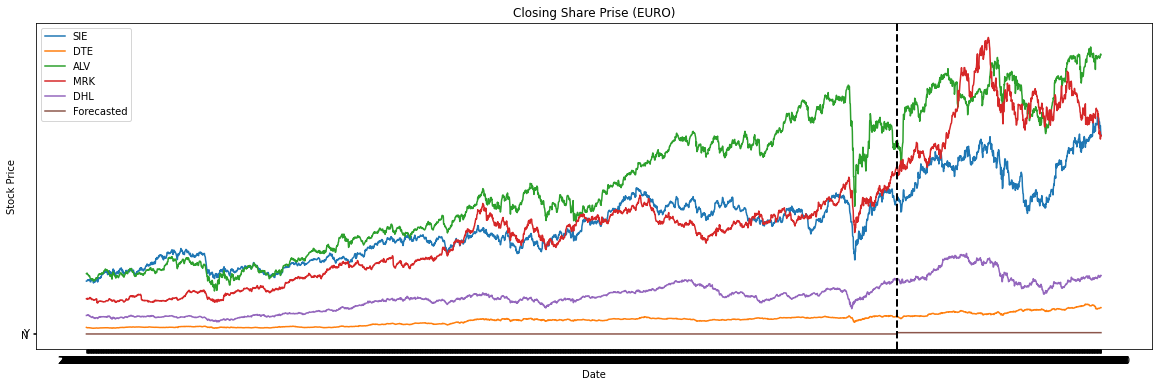

In [69]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df3.columns:
    plt.plot(df3.index, df3[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [70]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df3.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [71]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df3 = df3[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns3 = forecast_returns_df3.iloc[start:]
forecast_returns3 = forecast_returns3.reset_index(drop=True)

In [72]:
forecast_returns3

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,-0.022027,0.006377,0.003358,0.001309,-0.003114
943,-0.009544,0.007052,0.000239,-0.002288,-0.004397
944,0.013361,0.010656,0.010038,-0.035389,0.011621
945,-0.030681,0.006226,0.001656,0.022420,0.018496


## 3.1 Maximize the Sharpe ratio

In [73]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_3 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_3.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]

    portfolio_weights_min_var_3[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

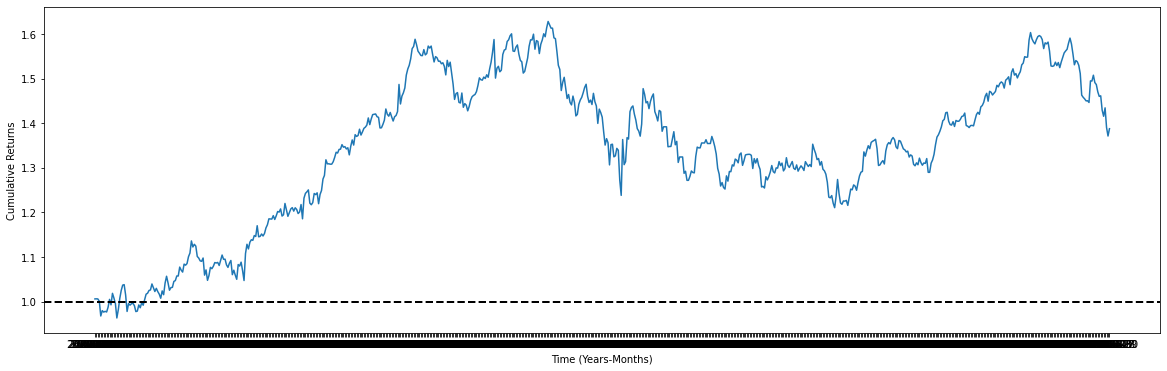

In [74]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_3 = np.sum(actual_returns.multiply(portfolio_weights_min_var_3), axis=1)
cumulative_returns_daily_min_var_3 = (1 + return_stocks_min_var_3).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_3)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [75]:
# Calculate portfolio variance
portfolio_variance_min_var_3 = np.dot(portfolio_weights_min_var_3[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_3[-1]))
portfolio_variance_min_var_3

0.0003187706755551244

In [76]:
# Calculate standard deviation
std_min_var_3 = np.sqrt(portfolio_variance_min_var_3)
std_min_var_3

0.017854150093329125

In [77]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_3[-1]

1.3880699304312063

In [78]:
# Check negative weights
np.any(portfolio_weights_min_var_3 < 0)

False

In [79]:
return_stocks_min_var_3.index = pd.to_datetime(return_stocks_min_var_3.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,12.626%
Cumulative returns,38.807%
Annual volatility,21.162%
Sharpe ratio,0.67
Calmar ratio,0.49
Stability,0.35
Max drawdown,-25.661%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.66,2021-12-28,2022-09-30,NaT,NaN
1,10.11,2021-08-20,2021-10-11,2021-11-19,66
2,7.82,2021-01-14,2021-03-05,2021-03-12,42
3,5.82,2020-11-06,2020-11-18,2020-12-03,20
4,5.50,2021-11-22,2021-12-02,2021-12-22,23


Stress Events,mean,min,max
New Normal,0.06%,-5.45%,10.12%


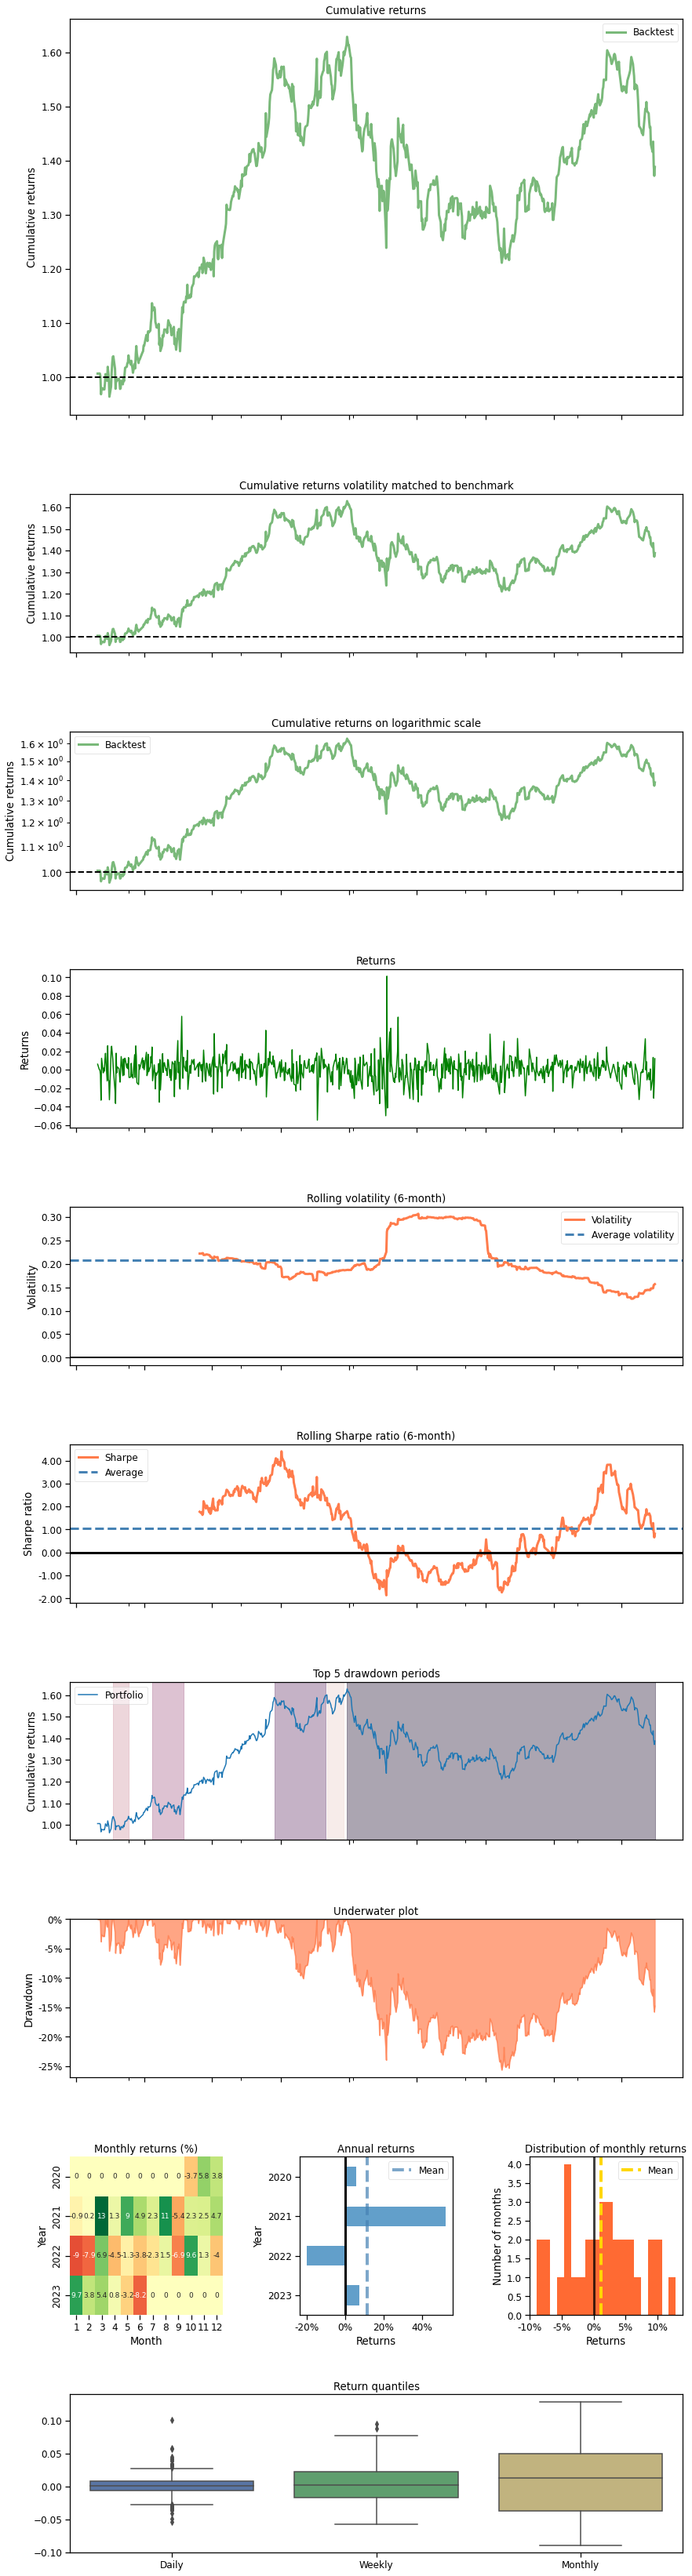

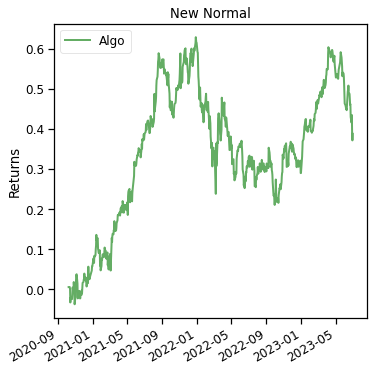

In [80]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_3, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

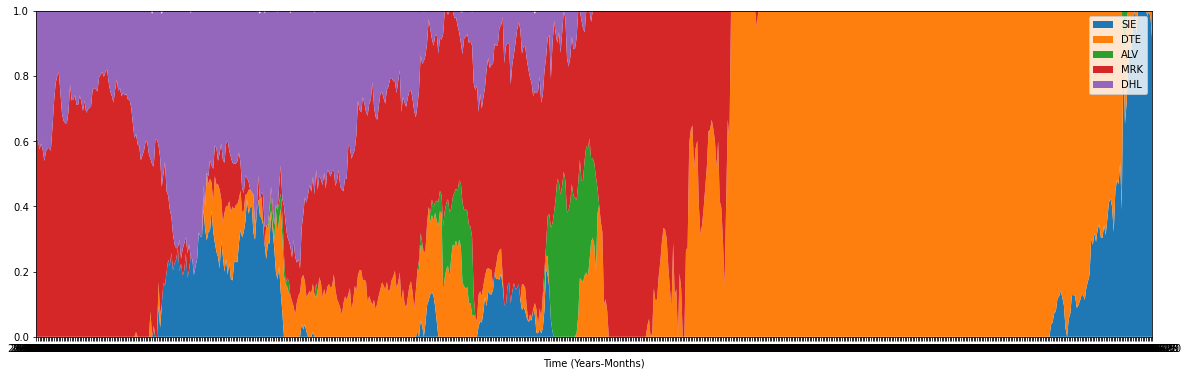

In [81]:
df_plot = pd.DataFrame (portfolio_weights_min_var_3, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [82]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.00000,0.0,0.60961,0.39039
2020-10-12,0.00000,0.00000,0.0,0.60192,0.39808
2020-10-13,0.00000,0.00000,0.0,0.57406,0.42594
2020-10-14,0.00000,0.00000,0.0,0.59273,0.40727
2020-10-15,0.00000,0.00000,0.0,0.57296,0.42704
...,...,...,...,...,...
2023-06-26,1.00000,0.00000,0.0,0.00000,0.00000
2023-06-27,0.98400,0.01600,0.0,0.00000,0.00000
2023-06-28,1.00000,0.00000,0.0,0.00000,0.00000


In [83]:
df_plot.to_csv('LR_min_var_3.csv', index=True)

# 4 Summary

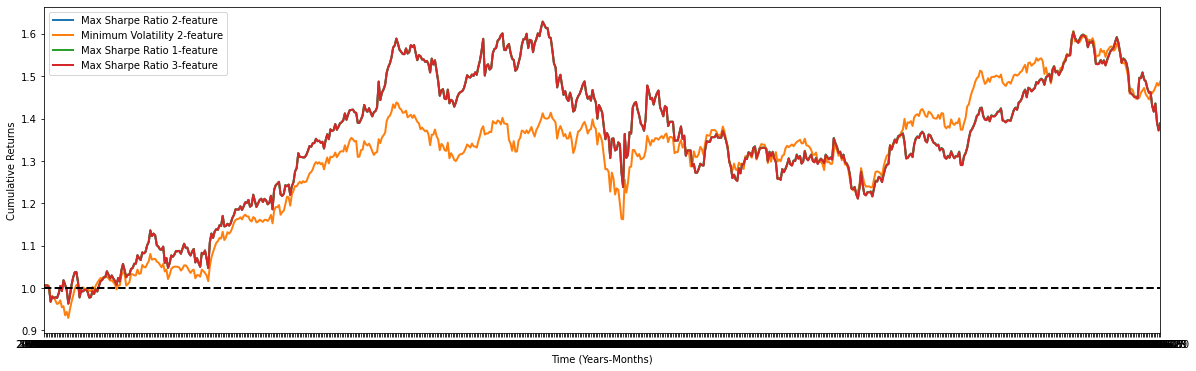

In [84]:
# Plotting all cumulative returns together
x = cumulative_returns_daily_min_var_3.index.values
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(x, cumulative_returns_daily_min_var_2, color='tab:blue', label="Max Sharpe Ratio 2-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_vol_2, color='tab:orange', label="Minimum Volatility 2-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_var_1, color='tab:green', label="Max Sharpe Ratio 1-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_var_3, color='tab:red', label="Max Sharpe Ratio 3-feature", linewidth =2.0)
plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()

# Bibliography

- Durall, R. (2022). Asset allocation: From markowitz to deep reinforcement learning. _arXiv preprint arXiv:2208.07158._